In [77]:
!pip3 install matplotlib
!pip3 install scipy
!pip3 install numpy

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [113]:
#Import the data set
titanic_data = pd.read_csv('titanic_train.csv')
mean_age = titanic_data['Age'].mean()

# Fill missing values in the Age column with the mean
titanic_data['Age'] = titanic_data['Age'].fillna(mean_age)

# Check the non-null counts for all columns
print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


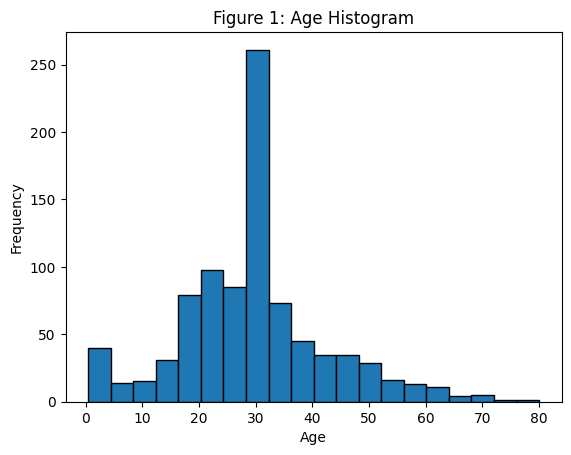

In [114]:
# 1. Histogram of Age
plt.hist(titanic_data['Age'], bins=20, edgecolor='black')
plt.title('Figure 1: Age Histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig("age_histogram.png")
plt.show()

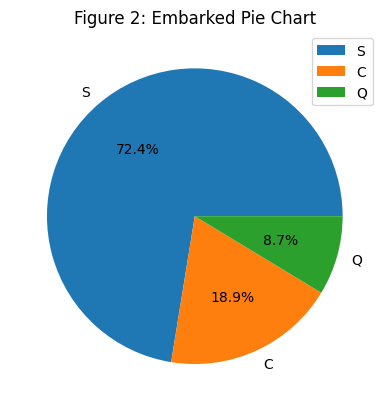

In [128]:
# 2. Pie Chart of Embarkation Points
embarked_counts = titanic_data['Embarked'].value_counts()
plt.pie(embarked_counts, autopct='%1.1f%%', labels=embarked_counts.index)
plt.title('Figure 2: Embarked Pie Chart')
plt.legend(embarked_counts.index)
plt.savefig("embarkation_pie_chart.png")
plt.show()

LinregressResult(slope=np.float64(0.3499636817440231), intercept=np.float64(21.810595412261044), rvalue=np.float64(0.09156609328505762), pvalue=np.float64(0.0062356761283033895), stderr=np.float64(0.1276465547446252), intercept_stderr=np.float64(4.137993901478174))


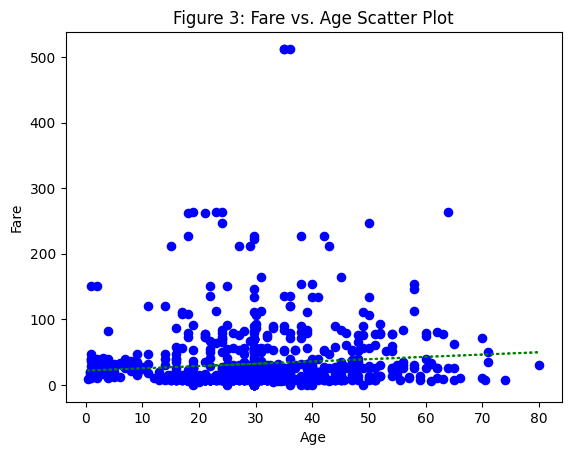

In [116]:
# 3. Scatter Plot of Fare vs. Age with Regression
# Calculate regression line manually
age = titanic_data['Age'].dropna()
fare = titanic_data['Fare'].dropna()
linear_model= scipy.stats.linregress(age,fare)
print(linear_model)
slope = linear_model.slope
y = linear_model.intercept
linear_fit = slope * age + y

plt.scatter(age,fare, marker="o", s = 35, color="blue")
plt.plot(age,linear_fit, color="green", linestyle = ":")
plt.title('Figure 3: Fare vs. Age Scatter Plot')
plt.xlabel('Age')
plt.ylabel('Fare')

# Call legend after the plot
plt.savefig("fare_vs_age_scatter.png")
plt.show()

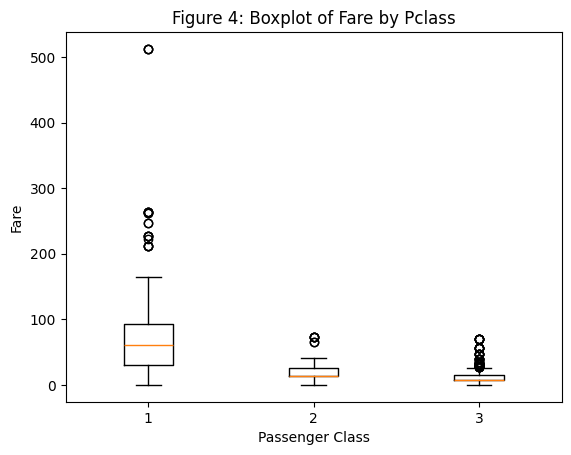

In [117]:
# 4. Boxplot of Fare by Passenger Class
plt.boxplot([titanic_data['Fare'][titanic_data['Pclass'] == i] for i in range(1, 4)], tick_labels=['1', '2', '3'])
plt.title('Figure 4: Boxplot of Fare by Pclass')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.savefig("fare_boxplot.png")
plt.show()


In [123]:
# 5. Contingency Table and Chi-Square Test
contingency_table = pd.crosstab(titanic_data['Pclass'], titanic_data['Survived'])

In [124]:
# Display the results
print("Table 1: Survived by Pclass Contingency Table")
print(contingency_table)
c, p, dof, expected = scipy.stats.chi2_contingency(contingency_table)
print("The P-Value is:", p)
# Calculate and print the difference between observed counts (sex_pclass_table) and expected counts (expected)
print(contingency_table - expected)

Table 1: Survived by Pclass Contingency Table
Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119
The P-Value is: 4.549251711298793e-23
Survived          0          1
Pclass                        
1        -53.090909  53.090909
2        -16.373737  16.373737
3         69.464646 -69.464646


In [125]:
# Interpretation
if p < 0.05:
    print("The relationship between survival and passenger class is statistically significant.")
else:
    print("The relationship between survival and passenger class is not statistically significant.")


The relationship between survival and passenger class is statistically significant.


In [126]:
survival_age = titanic_data.groupby('Survived')['Age'].mean()
print(survival_age)

Survived
0    30.415100
1    28.549778
Name: Age, dtype: float64


In [127]:
average_fares = titanic_data.groupby('Sex')['Fare'].mean()
print(average_fares)

Sex
female    44.479818
male      25.523893
Name: Fare, dtype: float64
